In [1]:
import time
import datetime
import math
import numpy as np
import pandas as pd

from owner_tools import *

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
import seaborn as sns #visualisation


# Sckit-learn
import sklearn
from sklearn.datasets import make_regression
from sklearn.svm import SVR,LinearSVR,NuSVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.compose import make_column_transformer,TransformedTargetRegressor
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor ,GradientBoostingRegressor,StackingRegressor
from sklearn.linear_model import LinearRegression,LassoCV,RidgeCV,Ridge,BayesianRidge
from sklearn.feature_selection import f_regression,chi2,RFE,VarianceThreshold,SelectKBest,SelectFromModel,SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler,scale,LabelEncoder,OneHotEncoder,MinMaxScaler,OrdinalEncoder,LabelBinarizer
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV,RandomizedSearchCV, cross_validate, cross_val_predict,ShuffleSplit,learning_curve
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix,classification_report,make_scorer, mean_absolute_error,mean_squared_log_error,median_absolute_error,mean_absolute_percentage_error
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.cross_decomposition import PLSCanonical, PLSRegression, CCA
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.utils.fixes import parse_version

# keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
# warnings ignore
# import warnings
# warnings.filterwarnings('ignore')

# scipy
import scipy
import pylab
from scipy import stats
from scipy.integrate import quad
from scipy.stats import pearsonr,skew,spearmanr

# Seaborn Settings
sns.set(color_codes=True)
sns.set_context('paper')
sns.set_theme(style="whitegrid")

# Plotly
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot as plotly_plot, iplot as plotly_iplot
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# from plotly import tools
import plotly.offline as offline
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)

from plotly import __version__ as plotly_version

print("Plotly - %s" % plotly_version)
print("Cufflinks - %s" % cf.__version__)

# Pandas settings
pd.set_option('display.min_rows', 100)
pd.set_option('display.max_rows', 1500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)
# pd.set_option('display.float_format', lambda x: '%.4f' % x)
# pd.set_option('display.float_format', lambda x: f'%.{len(str(x%1))-2}f' % x)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.options.display.max_info_columns = 120
# pd.reset_option('display.float_format')
# pd.set_option('precision', 4)
pd.set_option('display.max_columns', 250)

# IPython Modules
from IPython.core.display import display, HTML
from IPython.display import Image
display(HTML("<style>.container { width:100% !important; }</style>"))

Plotly - 4.14.3
Cufflinks - 0.17.3


# Settings

In [2]:
colors = sns.color_palette("tab10",100)
colors

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.580392156

# Get Data

In [3]:
raw_data = pd.read_csv('data_main.csv')
raw_data.head()

ozellik_1 ozellik_2  ozellik_3 ozellik_4 ozellik_5 ozellik_6  ozellik_7 ozellik_8  ozellik_9  ozellik_10  ozellik_12 ozellik_13  ozellik_14  ozellik_15  ozellik_16    hedef  bizim_tahminimiz  tarih_number
0   -0.59251     SBVsf   -1.66111     u8Pns     jQ3qR     ah4hY    0.39339     2P147   -1.18206    -1.77953     1.17417      GotFh     0.62460     0.94159     0.76219  2.80955           3.31025      20150915
1    0.11895     SBVsf   -0.89064     u8Pns     jQ3qR     oTeIN   -0.10350     2P147   -0.77542    -0.47004     0.45156      GotFh     0.62460     1.29252     0.61170  0.87382           0.70029      20170405
2    0.52551     IGKSa   -0.69803     u8Pns     jQ3qR     oTeIN   -0.60039     2P147   -0.82061     0.01307    -0.27106      7m2n3    -0.08703     0.38306     0.47376 -0.36304          -0.38617      20170410
3   -0.64333     guoIE   -1.27588     u8Pns     jQ3qR     oTeIN    0.06213     2P147   -1.22725    -1.59052     1.00741      7m2n3     0.62460     0.10627     0.31072  1.58843           1.56557      20170410
4    1.18615     IGKSa   -1.46849     7Ug6w     98zl9     oTeIN   -1.09729     2P147   -1.27243    -1.57050    -0.93809      9DWAo    -0.08703    -0.60549    -0.49189  0.10800           0.11521      20170410

In [4]:
raw_data.describe(include='all').T.sort_values("freq")

count unique    top   freq           mean        std            min            25%            50%            75%            max
ozellik_2          89970     30  IGKSa  14845            NaN        NaN            NaN            NaN            NaN            NaN            NaN
ozellik_5          89970     19  jQ3qR  38253            NaN        NaN            NaN            NaN            NaN            NaN            NaN
ozellik_13         89970     11  7m2n3  40575            NaN        NaN            NaN            NaN            NaN            NaN            NaN
ozellik_4          89970     13  u8Pns  44616            NaN        NaN            NaN            NaN            NaN            NaN            NaN
ozellik_8          89970      3  2P147  50743            NaN        NaN            NaN            NaN            NaN            NaN            NaN
ozellik_6          89970     22  bgvzF  67477            NaN        NaN            NaN            NaN            NaN            NaN            NaN
ozellik_1        89970.0    NaN    NaN    NaN        0.00008    1.00006       -3.94656       -0.59251       -0.08432        0.62714        5.04839
ozellik_3        89970.0    NaN    NaN    NaN        0.00037    0.99991       -1.66111       -0.89064       -0.12018        0.65028        3.73214
ozellik_7        89970.0    NaN    NaN    NaN       -0.00004    1.00005       -2.09107       -0.60039       -0.10350        0.39339        9.03934
ozellik_9        89970.0    NaN    NaN    NaN        0.00025    0.99998       -1.67907       -0.82061       -0.27842        0.76077        3.56207
ozellik_10       89970.0    NaN    NaN    NaN        0.00033    0.99996       -1.77953       -0.76179       -0.07481        0.66305        5.85352
ozellik_12       89970.0    NaN    NaN    NaN       -0.00006    1.00006       -2.77242       -0.82692       -0.10430        0.45156        3.61995
ozellik_14       89970.0    NaN    NaN    NaN       -0.00014    1.00008       -2.06538       -0.77020       -0.08703        0.62460        5.60605
ozellik_15       89970.0    NaN    NaN    NaN       -0.00004    1.00009       -3.10650       -0.70928       -0.09638        0.58077        6.49721
ozellik_16       89970.0    NaN    NaN    NaN       -0.00004    1.00010       -5.69634       -0.57968        0.00974        0.53646        5.62805
hedef            89970.0    NaN    NaN    NaN       -0.00012    1.00006       -1.29382       -0.60246       -0.25148        0.26318       13.05273
bizim_tahminimiz 89970.0    NaN    NaN    NaN       -0.00104    0.98725       -1.20925       -0.59815       -0.25209        0.25958       12.70167
tarih_number     89970.0    NaN    NaN    NaN 20192309.60253 8291.93506 20150915.00000 20190122.00000 20190628.00000 20200509.00000 20210124.00000

In [5]:
data_number = raw_data.select_dtypes(exclude=[np.object])
data_number.head()

ozellik_1  ozellik_3  ozellik_7  ozellik_9  ozellik_10  ozellik_12  ozellik_14  ozellik_15  ozellik_16    hedef  bizim_tahminimiz  tarih_number
0   -0.59251   -1.66111    0.39339   -1.18206    -1.77953     1.17417     0.62460     0.94159     0.76219  2.80955           3.31025      20150915
1    0.11895   -0.89064   -0.10350   -0.77542    -0.47004     0.45156     0.62460     1.29252     0.61170  0.87382           0.70029      20170405
2    0.52551   -0.69803   -0.60039   -0.82061     0.01307    -0.27106    -0.08703     0.38306     0.47376 -0.36304          -0.38617      20170410
3   -0.64333   -1.27588    0.06213   -1.22725    -1.59052     1.00741     0.62460     0.10627     0.31072  1.58843           1.56557      20170410
4    1.18615   -1.46849   -1.09729   -1.27243    -1.57050    -0.93809    -0.08703    -0.60549    -0.49189  0.10800           0.11521      20170410

In [6]:
number_cols = data_number.columns
number_cols

Index(['ozellik_1', 'ozellik_3', 'ozellik_7', 'ozellik_9', 'ozellik_10',
       'ozellik_12', 'ozellik_14', 'ozellik_15', 'ozellik_16', 'hedef',
       'bizim_tahminimiz', 'tarih_number'],
      dtype='object')

In [7]:
data_categorical = raw_data.select_dtypes(include=[np.object])
data_categorical.head()

ozellik_2 ozellik_4 ozellik_5 ozellik_6 ozellik_8 ozellik_13
0     SBVsf     u8Pns     jQ3qR     ah4hY     2P147      GotFh
1     SBVsf     u8Pns     jQ3qR     oTeIN     2P147      GotFh
2     IGKSa     u8Pns     jQ3qR     oTeIN     2P147      7m2n3
3     guoIE     u8Pns     jQ3qR     oTeIN     2P147      7m2n3
4     IGKSa     7Ug6w     98zl9     oTeIN     2P147      9DWAo

In [8]:
categorical_cols = data_categorical.columns
categorical_cols

Index(['ozellik_2', 'ozellik_4', 'ozellik_5', 'ozellik_6', 'ozellik_8',
       'ozellik_13'],
      dtype='object')

# Correlation

In [9]:
categorical_cols = data_categorical.columns

In [10]:
all_corr = correlation_cols(raw_data.drop(categorical_cols,axis=1),raw_data['bizim_tahminimiz'])
all_corr

Features  Correlation  Correlation_Abs  P-Value
10  bizim_tahminimiz      1.00000          1.00000  0.00000
9              hedef      0.98908          0.98908  0.00000
2          ozellik_7      0.62318          0.62318  0.00000
6         ozellik_14      0.61619          0.61619  0.00000
7         ozellik_15      0.58098          0.58098  0.00000
5         ozellik_12      0.56190          0.56190  0.00000
0          ozellik_1     -0.49446          0.49446  0.00000
1          ozellik_3     -0.49046          0.49046  0.00000
8         ozellik_16      0.40047          0.40047  0.00000
4         ozellik_10     -0.38216          0.38216  0.00000
3          ozellik_9     -0.18980          0.18980  0.00000
11      tarih_number      0.12594          0.12594  0.00000

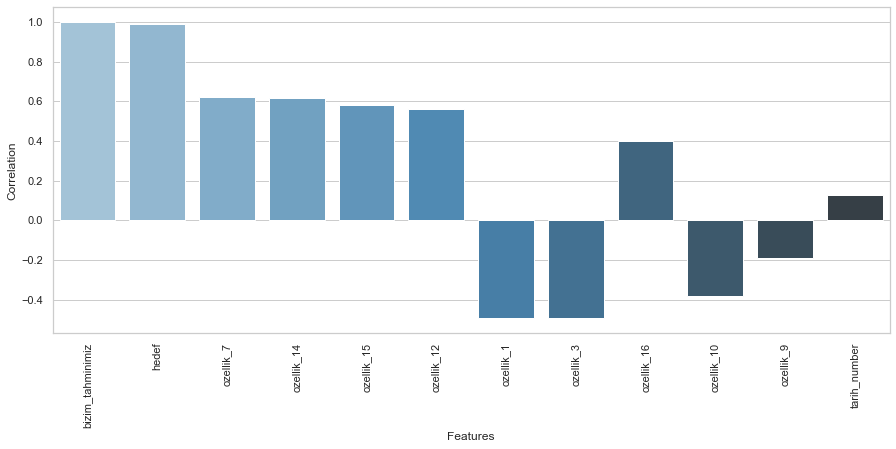

In [11]:
figsize_set = (15,6)
fig, (ay0) = plt.subplots(nrows=1,figsize=figsize_set)
plt.xticks(rotation=90)
sns.barplot(x="Features", y="Correlation", data=all_corr,ax=ay0, palette="Blues_d")
plt.show()

# Data Edit

In [12]:
data_edit = raw_data.copy()

In [13]:
data_edit['difference'] = data_edit['hedef'] - data_edit['bizim_tahminimiz']
data_edit['percent'] = data_edit['difference'] / data_edit['hedef'] * 100
data_edit['percent_error_gt_number'] = data_edit.apply(
    lambda x: 100 if np.abs(x['percent']) > 100 else 50
    if np.abs(x['percent']) > 50 else 25 if np.abs(x['percent']) > 25 else 10
    if np.abs(x['percent']) > 10 else 5 if np.abs(x['percent']) > 5 else 1
    if np.abs(x['percent']) > 1 else 0,
    axis=1)
data_edit['percent_error'] = data_edit.apply(
    lambda x: "100<" if np.abs(x['percent']) > 100 else "50-100"
    if np.abs(x['percent']) > 50 else "25-50"
    if np.abs(x['percent']) > 25 else "10-25"
    if np.abs(x['percent']) > 10 else "5-10"
    if np.abs(x['percent']) > 5 else "1-5"
    if np.abs(x['percent']) > 1 else "<1",
    axis=1)

In [14]:
data_edit.head()

ozellik_1 ozellik_2  ozellik_3 ozellik_4 ozellik_5 ozellik_6  ozellik_7 ozellik_8  ozellik_9  ozellik_10  ozellik_12 ozellik_13  ozellik_14  ozellik_15  ozellik_16    hedef  bizim_tahminimiz  tarih_number  difference   percent  percent_error_gt_number percent_error
0   -0.59251     SBVsf   -1.66111     u8Pns     jQ3qR     ah4hY    0.39339     2P147   -1.18206    -1.77953     1.17417      GotFh     0.62460     0.94159     0.76219  2.80955           3.31025      20150915    -0.50070 -17.82145                       10         10-25
1    0.11895     SBVsf   -0.89064     u8Pns     jQ3qR     oTeIN   -0.10350     2P147   -0.77542    -0.47004     0.45156      GotFh     0.62460     1.29252     0.61170  0.87382           0.70029      20170405     0.17354  19.85947                       10         10-25
2    0.52551     IGKSa   -0.69803     u8Pns     jQ3qR     oTeIN   -0.60039     2P147   -0.82061     0.01307    -0.27106      7m2n3    -0.08703     0.38306     0.47376 -0.36304          -0.38617      20170410     0.02313  -6.37015                        5          5-10
3   -0.64333     guoIE   -1.27588     u8Pns     jQ3qR     oTeIN    0.06213     2P147   -1.22725    -1.59052     1.00741      7m2n3     0.62460     0.10627     0.31072  1.58843           1.56557      20170410     0.02286   1.43916                        1           1-5
4    1.18615     IGKSa   -1.46849     7Ug6w     98zl9     oTeIN   -1.09729     2P147   -1.27243    -1.57050    -0.93809      9DWAo    -0.08703    -0.60549    -0.49189  0.10800           0.11521      20170410    -0.00720  -6.66974                        5          5-10

In [49]:
data_edit.percent_error_gt_number.drop_duplicates().to_list()

[10, 5, 1, 25, 50, 100, 0]

In [15]:
unique_counts = pd.DataFrame.from_records([(col, data_edit[col].nunique(),data_edit[col].dtypes) for col in data_edit.columns],
                          columns=['Column_Name', 'Num_Unique','Data_Type'])
unique_counts

Column_Name  Num_Unique Data_Type
0                 ozellik_1         145   float64
1                 ozellik_2          30    object
2                 ozellik_3          29   float64
3                 ozellik_4          13    object
4                 ozellik_5          19    object
5                 ozellik_6          22    object
6                 ozellik_7         161   float64
7                 ozellik_8           3    object
8                 ozellik_9         115   float64
9                ozellik_10       13475   float64
10               ozellik_12         108   float64
11               ozellik_13          11    object
12               ozellik_14         197   float64
13               ozellik_15         774   float64
14               ozellik_16         283   float64
15                    hedef       72231   float64
16         bizim_tahminimiz       89798   float64
17             tarih_number        1113     int64
18               difference       89955   float64
19                  percent       89955   float64
20  percent_error_gt_number           7     int64
21            percent_error           7    object

<AxesSubplot:xlabel='percent', ylabel='difference'>

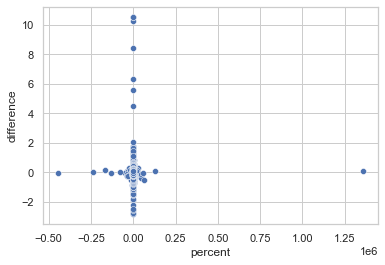

In [16]:
sns.scatterplot(x='percent', y='difference',data=data_edit)

In [17]:
selected_cols = ['hedef', 'bizim_tahminimiz','difference','percent',"percent_error_gt_number","percent_error"]

In [18]:
data_edit[selected_cols].head(10)

hedef  bizim_tahminimiz  difference   percent  percent_error_gt_number percent_error
0  2.80955           3.31025    -0.50070 -17.82145                       10         10-25
1  0.87382           0.70029     0.17354  19.85947                       10         10-25
2 -0.36304          -0.38617     0.02313  -6.37015                        5          5-10
3  1.58843           1.56557     0.02286   1.43916                        1           1-5
4  0.10800           0.11521    -0.00720  -6.66974                        5          5-10
5  0.42305           0.47346    -0.05041 -11.91464                       10         10-25
6  1.32232           1.47568    -0.15336 -11.59788                       10         10-25
7 -0.19787          -0.17927    -0.01860   9.40037                        5          5-10
8  1.67101           1.77304    -0.10202  -6.10543                        5          5-10
9  1.51808           1.45208     0.06600   4.34738                        1           1-5

In [19]:
 pd.crosstab(data_edit.percent_error_gt_number,data_edit.percent_error,normalize=True,margins=True,margins_name="TOTAL")

percent_error               1-5   10-25    100<   25-50    5-10  50-100      <1   TOTAL
percent_error_gt_number                                                                
0                       0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.05898 0.05898
1                       0.21831 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.21831
5                       0.00000 0.00000 0.00000 0.00000 0.19272 0.00000 0.00000 0.19272
10                      0.00000 0.26136 0.00000 0.00000 0.00000 0.00000 0.00000 0.26136
25                      0.00000 0.00000 0.00000 0.12680 0.00000 0.00000 0.00000 0.12680
50                      0.00000 0.00000 0.00000 0.00000 0.00000 0.07062 0.00000 0.07062
100                     0.00000 0.00000 0.07121 0.00000 0.00000 0.00000 0.00000 0.07121
TOTAL                   0.21831 0.26136 0.07121 0.12680 0.19272 0.07062 0.05898 1.00000

In [20]:
 pd.crosstab(data_edit.percent_error_gt_number,data_edit.percent_error,margins=True,margins_name="TOTAL")

percent_error              1-5  10-25  100<  25-50   5-10  50-100    <1  TOTAL
percent_error_gt_number                                                       
0                            0      0     0      0      0       0  5306   5306
1                        19641      0     0      0      0       0     0  19641
5                            0      0     0      0  17339       0     0  17339
10                           0  23515     0      0      0       0     0  23515
25                           0      0     0  11408      0       0     0  11408
50                           0      0     0      0      0    6354     0   6354
100                          0      0  6407      0      0       0     0   6407
TOTAL                    19641  23515  6407  11408  17339    6354  5306  89970

# Good Score Percent Less Then 10

In [21]:
percent_lt_10 = data_edit[data_edit['percent_error_gt_number']<10].drop(['hedef', 'bizim_tahminimiz','difference','percent',],axis=1).drop_duplicates()
percent_lt_10.head()

ozellik_1 ozellik_2  ozellik_3 ozellik_4 ozellik_5 ozellik_6  ozellik_7 ozellik_8  ozellik_9  ozellik_10  ozellik_12 ozellik_13  ozellik_14  ozellik_15  ozellik_16  tarih_number  percent_error_gt_number percent_error
2    0.52551     IGKSa   -0.69803     u8Pns     jQ3qR     oTeIN   -0.60039     2P147   -0.82061     0.01307    -0.27106      7m2n3    -0.08703     0.38306     0.47376      20170410                        5          5-10
3   -0.64333     guoIE   -1.27588     u8Pns     jQ3qR     oTeIN    0.06213     2P147   -1.22725    -1.59052     1.00741      7m2n3     0.62460     0.10627     0.31072      20170410                        1           1-5
4    1.18615     IGKSa   -1.46849     7Ug6w     98zl9     oTeIN   -1.09729     2P147   -1.27243    -1.57050    -0.93809      9DWAo    -0.08703    -0.60549    -0.49189      20170410                        5          5-10
7    0.98288     SBVsf   -1.08326     7Ug6w     jQ3qR     oTeIN   -1.09729     2P147   -1.13688    -1.46104    -0.82692      9DWAo    -0.37168    -0.67468    -1.11893      20170410                        5          5-10
8   -0.64333     ZrgoT   -1.27588     emFmb     jQ3qR     oTeIN    0.72466     2P147   -0.82061    -1.65632    -0.15989      ThXWF     1.62089     0.95147     0.36089      20170410                        5          5-10

In [22]:
percent_lt_10.describe(include='all').T.sort_values('freq')

count unique    top   freq           mean        std            min            25%            50%            75%            max
ozellik_2                 42282     29  IGKSa   7398            NaN        NaN            NaN            NaN            NaN            NaN            NaN
ozellik_5                 42282     19  jQ3qR  16147            NaN        NaN            NaN            NaN            NaN            NaN            NaN
ozellik_13                42282     11  7m2n3  17573            NaN        NaN            NaN            NaN            NaN            NaN            NaN
percent_error             42282      3    1-5  19638            NaN        NaN            NaN            NaN            NaN            NaN            NaN
ozellik_4                 42282     13  u8Pns  21031            NaN        NaN            NaN            NaN            NaN            NaN            NaN
ozellik_8                 42282      3  2P147  22024            NaN        NaN            NaN            NaN            NaN            NaN            NaN
ozellik_6                 42282     22  bgvzF  31775            NaN        NaN            NaN            NaN            NaN            NaN            NaN
ozellik_1               42282.0    NaN    NaN    NaN        0.07441    1.06140       -3.94656       -0.59251        0.06814        0.83042        5.04839
ozellik_3               42282.0    NaN    NaN    NaN        0.23068    1.10826       -1.66111       -0.69803        0.07244        1.03552        3.73214
ozellik_7               42282.0    NaN    NaN    NaN       -0.08867    1.05956       -2.09107       -0.76602       -0.26913        0.22776        9.03934
ozellik_9               42282.0    NaN    NaN    NaN        0.08870    1.00438       -1.67907       -0.73024       -0.14287        0.89632        3.56207
ozellik_10              42282.0    NaN    NaN    NaN        0.14441    1.03971       -1.77953       -0.66001        0.12873        0.85387        5.85352
ozellik_12              42282.0    NaN    NaN    NaN       -0.06497    1.04948       -2.77242       -0.82692       -0.21547        0.45156        3.61995
ozellik_14              42282.0    NaN    NaN    NaN       -0.11877    1.05140       -2.06538       -0.82713       -0.25782        0.48228        5.60605
ozellik_15              42282.0    NaN    NaN    NaN       -0.13765    1.05147       -3.10650       -0.90699       -0.26444        0.45720        6.49721
ozellik_16              42282.0    NaN    NaN    NaN       -0.13193    1.03253       -5.69634       -0.85558       -0.26616        0.49884        5.62805
tarih_number            42282.0    NaN    NaN    NaN 20191749.73658 8048.37969 20170410.00000 20190113.00000 20190606.00000 20200312.00000 20210124.00000
percent_error_gt_number 42282.0    NaN    NaN    NaN        2.51473    2.09573        0.00000        1.00000        1.00000        5.00000        5.00000

In [23]:
percent_lt_10_unique_counts = pd.DataFrame.from_records([(col, percent_lt_10[col].nunique(),percent_lt_10[col].dtypes) for col in percent_lt_10.columns],
                          columns=['Column_Name', 'Num_Unique','Data_Type']).sort_values(by=['Data_Type','Num_Unique'])
percent_lt_10_unique_counts

Column_Name  Num_Unique Data_Type
16  percent_error_gt_number           3     int64
15             tarih_number        1084     int64
2                 ozellik_3          29   float64
10               ozellik_12         107   float64
8                 ozellik_9         115   float64
0                 ozellik_1         141   float64
6                 ozellik_7         150   float64
12               ozellik_14         186   float64
14               ozellik_16         273   float64
13               ozellik_15         703   float64
9                ozellik_10        7574   float64
7                 ozellik_8           3    object
17            percent_error           3    object
11               ozellik_13          11    object
3                 ozellik_4          13    object
4                 ozellik_5          19    object
5                 ozellik_6          22    object
1                 ozellik_2          29    object

In [24]:
raw_data.columns.drop(['bizim_tahminimiz'])

Index(['ozellik_1', 'ozellik_2', 'ozellik_3', 'ozellik_4', 'ozellik_5',
       'ozellik_6', 'ozellik_7', 'ozellik_8', 'ozellik_9', 'ozellik_10',
       'ozellik_12', 'ozellik_13', 'ozellik_14', 'ozellik_15', 'ozellik_16',
       'hedef', 'tarih_number'],
      dtype='object')

In [25]:
target_colname = 'percent_error_gt_number'
percent_lt_10_all = pd.DataFrame()
for col_name in raw_data.columns.drop(['hedef','bizim_tahminimiz']):
#     print("col_name->",col_name)
    percent_lt_10_cols = pd.DataFrame()
    percent_lt_10_cols['count'] = percent_lt_10.groupby([col_name])[target_colname].count()
    percent_lt_10_cols['column_name'] = col_name
    percent_lt_10_cols['percent'] = percent_lt_10[col_name].value_counts(normalize=True)*100
    percent_lt_10_cols = percent_lt_10_cols.reset_index().reindex().rename({col_name:'values'},axis=1).sort_values(by='count')
    percent_lt_10_all = percent_lt_10_all.append(percent_lt_10_cols,ignore_index=True)
percent_lt_10_all

values  count   column_name  percent
0      -3.94656      1     ozellik_1  0.00237
1       4.23529      1     ozellik_1  0.00237
2       3.57464      1     ozellik_1  0.00237
3      -3.48919      1     ozellik_1  0.00237
4      -3.43837      1     ozellik_1  0.00237
5       3.52382      1     ozellik_1  0.00237
6       3.11727      1     ozellik_1  0.00237
7       2.65990      1     ozellik_1  0.00237
8       2.25335      1     ozellik_1  0.00237
9       4.54020      2     ozellik_1  0.00473
10     -2.62527      2     ozellik_1  0.00473
11      5.04839      2     ozellik_1  0.00473
12     -3.13346      2     ozellik_1  0.00473
13     -3.74329      2     ozellik_1  0.00473
14      2.81236      3     ozellik_1  0.00710
15     -3.28592      3     ozellik_1  0.00710
16     -2.67609      4     ozellik_1  0.00946
17      3.67628      4     ozellik_1  0.00946
18     -3.18428      4     ozellik_1  0.00946
19      3.47301      4     ozellik_1  0.00946
20     -3.59083      4     ozellik_1  0.00946
21     -2.72691      5     ozellik_1  0.01183
22      2.76154      6     ozellik_1  0.01419
23     -3.08264      7     ozellik_1  0.01656
24      2.45663      8     ozellik_1  0.01892
25      3.16809      8     ozellik_1  0.01892
26      2.35499      9     ozellik_1  0.02129
27     -2.93018     11     ozellik_1  0.02602
28     -3.03182     11     ozellik_1  0.02602
29     -2.82855     11     ozellik_1  0.02602
30     -2.87936     12     ozellik_1  0.02838
31      2.40581     13     ozellik_1  0.03075
32      3.82874     14     ozellik_1  0.03311
33      2.15171     14     ozellik_1  0.03311
34      1.94844     15     ozellik_1  0.03548
35      2.91400     15     ozellik_1  0.03548
36      4.28611     18     ozellik_1  0.04257
37     -2.47281     24     ozellik_1  0.05676
38     -2.57445     26     ozellik_1  0.06149
39     -2.77773     27     ozellik_1  0.06386
40     -2.98100     29     ozellik_1  0.06859
41      1.23697     32     ozellik_1  0.07568
42      3.01564     34     ozellik_1  0.08041
43     -2.26954     35     ozellik_1  0.08278
44      1.99926     36     ozellik_1  0.08514
45      1.89762     43     ozellik_1  0.10170
46      2.50745     45     ozellik_1  0.10643
47      3.06645     46     ozellik_1  0.10879
48      2.71072     49     ozellik_1  0.11589
49      1.08451     53     ozellik_1  0.12535
...         ...    ...           ...      ...
10409  20190507     95  tarih_number  0.22468
10410  20190314     95  tarih_number  0.22468
10411  20190528     97  tarih_number  0.22941
10412  20190311     97  tarih_number  0.22941
10413  20190321     98  tarih_number  0.23178
10414  20190501     98  tarih_number  0.23178
10415  20190517     98  tarih_number  0.23178
10416  20190708     98  tarih_number  0.23178
10417  20191111     99  tarih_number  0.23414
10418  20190408     99  tarih_number  0.23414
10419  20180608     99  tarih_number  0.23414
10420  20190319    100  tarih_number  0.23651
10421  20190530    101  tarih_number  0.23887
10422  20190404    101  tarih_number  0.23887
10423  20190409    103  tarih_number  0.24360
10424  20181029    103  tarih_number  0.24360
10425  20190416    103  tarih_number  0.24360
10426  20190523    105  tarih_number  0.24833
10427  20190219    106  tarih_number  0.25070
10428  20190527    106  tarih_number  0.25070
10429  20190410    107  tarih_number  0.25306
10430  20190411    107  tarih_number  0.25306
10431  20181107    107  tarih_number  0.25306
10432  20190326    108  tarih_number  0.25543
10433  20181210    109  tarih_number  0.25779
10434  20190430    111  tarih_number  0.26252
10435  20181111    112  tarih_number  0.26489
10436  20190131    116  tarih_number  0.27435
10437  20190502    117  tarih_number  0.27671
10438  20190611    121  tarih_number  0.28617
10439  20190426    122  tarih_number  0.28854
10440  20190508    127  tarih_number  0.30036
10441  20181126    128  tarih_number  0.30273
10442  20181202    128  tarih_number  0.30273
10443  20180907    132  tarih_number  0.31219
10444  

In [26]:
percent_lt_10_all.columns = percent_lt_10_all.columns+'_lt_10'
percent_lt_10_all

values_lt_10  count_lt_10 column_name_lt_10  percent_lt_10
0         -3.94656            1         ozellik_1        0.00237
1          4.23529            1         ozellik_1        0.00237
2          3.57464            1         ozellik_1        0.00237
3         -3.48919            1         ozellik_1        0.00237
4         -3.43837            1         ozellik_1        0.00237
5          3.52382            1         ozellik_1        0.00237
6          3.11727            1         ozellik_1        0.00237
7          2.65990            1         ozellik_1        0.00237
8          2.25335            1         ozellik_1        0.00237
9          4.54020            2         ozellik_1        0.00473
10        -2.62527            2         ozellik_1        0.00473
11         5.04839            2         ozellik_1        0.00473
12        -3.13346            2         ozellik_1        0.00473
13        -3.74329            2         ozellik_1        0.00473
14         2.81236            3         ozellik_1        0.00710
15        -3.28592            3         ozellik_1        0.00710
16        -2.67609            4         ozellik_1        0.00946
17         3.67628            4         ozellik_1        0.00946
18        -3.18428            4         ozellik_1        0.00946
19         3.47301            4         ozellik_1        0.00946
20        -3.59083            4         ozellik_1        0.00946
21        -2.72691            5         ozellik_1        0.01183
22         2.76154            6         ozellik_1        0.01419
23        -3.08264            7         ozellik_1        0.01656
24         2.45663            8         ozellik_1        0.01892
25         3.16809            8         ozellik_1        0.01892
26         2.35499            9         ozellik_1        0.02129
27        -2.93018           11         ozellik_1        0.02602
28        -3.03182           11         ozellik_1        0.02602
29        -2.82855           11         ozellik_1        0.02602
30        -2.87936           12         ozellik_1        0.02838
31         2.40581           13         ozellik_1        0.03075
32         3.82874           14         ozellik_1        0.03311
33         2.15171           14         ozellik_1        0.03311
34         1.94844           15         ozellik_1        0.03548
35         2.91400           15         ozellik_1        0.03548
36         4.28611           18         ozellik_1        0.04257
37        -2.47281           24         ozellik_1        0.05676
38        -2.57445           26         ozellik_1        0.06149
39        -2.77773           27         ozellik_1        0.06386
40        -2.98100           29         ozellik_1        0.06859
41         1.23697           32         ozellik_1        0.07568
42         3.01564           34         ozellik_1        0.08041
43        -2.26954           35         ozellik_1        0.08278
44         1.99926           36         ozellik_1        0.08514
45         1.89762           43         ozellik_1        0.10170
46         2.50745           45         ozellik_1        0.10643
47         3.06645           46         ozellik_1        0.10879
48         2.71072           49         ozellik_1        0.11589
49         1.08451           53         ozellik_1        0.12535
...            ...          ...               ...            ...
10409     20190507           95      tarih_number        0.22468
10410     20190314           95      tarih_number        0.22468
10411     20190528           97      tarih_number        0.22941
10412     20190311           97      tarih_number        0.22941
10413     20190321           98      tarih_number        0.23178
10414     20190501           98      tarih_number        0.23178
10415     20190517           98      tarih_number        0.23178
10416     20190708           98      tarih_number        0.23178
10417     20191111           99      tarih_number        0.23414
10418     20190408           99      tari

In [27]:
percent_lt_10_all.loc[:,['values_lt_10','column_name_lt_10']].drop_duplicates()['column_name_lt_10'].value_counts()

ozellik_10      7574
tarih_number    1084
ozellik_15       703
ozellik_16       273
ozellik_14       186
ozellik_7        150
ozellik_1        141
ozellik_9        115
ozellik_12       107
ozellik_2         29
ozellik_3         29
ozellik_6         22
ozellik_5         19
ozellik_4         13
ozellik_13        11
ozellik_8          3
Name: column_name_lt_10, dtype: int64

# Bad Score Percent Greater Then 10

In [28]:
percent_gt_10 = data_edit[data_edit['percent_error_gt_number']>=10].drop(['hedef', 'bizim_tahminimiz','difference','percent',],axis=1).drop_duplicates()
percent_gt_10.head()

ozellik_1 ozellik_2  ozellik_3 ozellik_4 ozellik_5 ozellik_6  ozellik_7 ozellik_8  ozellik_9  ozellik_10  ozellik_12 ozellik_13  ozellik_14  ozellik_15  ozellik_16  tarih_number  percent_error_gt_number percent_error
0    -0.59251     SBVsf   -1.66111     u8Pns     jQ3qR     ah4hY    0.39339     2P147   -1.18206    -1.77953     1.17417      GotFh     0.62460     0.94159     0.76219      20150915                       10         10-25
1     0.11895     SBVsf   -0.89064     u8Pns     jQ3qR     oTeIN   -0.10350     2P147   -0.77542    -0.47004     0.45156      GotFh     0.62460     1.29252     0.61170      20170405                       10         10-25
5    -0.03350     SBVsf   -1.27588     7Ug6w     jQ3qR     oTeIN   -0.60039     2P147   -1.22725    -1.61584     0.00687      7m2n3     0.33995     0.05684     0.34835      20170410                       10         10-25
6    -1.15152     SBVsf   -1.27588     u8Pns     jQ3qR     oTeIN    0.55903     fwWAa   -0.50433    -1.61425     1.28534      GotFh    -0.08703     0.56100     0.76219      20170410                       10         10-25
14    1.18615     IGKSa   -1.27588     7Ug6w     jQ3qR     oTeIN   -1.09729     2P147   -1.27243    -1.51246    -0.93809      9DWAo    -0.08703    -0.60549    -0.49189      20170411                       10         10-25

In [29]:
percent_gt_10.describe(include='all').T.sort_values('freq')

count unique    top   freq           mean        std            min            25%            50%            75%            max
ozellik_2                 47683     29  IGKSa   7447            NaN        NaN            NaN            NaN            NaN            NaN            NaN
ozellik_5                 47683     18  jQ3qR  22103            NaN        NaN            NaN            NaN            NaN            NaN            NaN
ozellik_13                47683     11  7m2n3  23001            NaN        NaN            NaN            NaN            NaN            NaN            NaN
percent_error             47683      4  10-25  23514            NaN        NaN            NaN            NaN            NaN            NaN            NaN
ozellik_4                 47683     13  u8Pns  23583            NaN        NaN            NaN            NaN            NaN            NaN            NaN
ozellik_8                 47683      3  2P147  28715            NaN        NaN            NaN            NaN            NaN            NaN            NaN
ozellik_6                 47683     22  bgvzF  35699            NaN        NaN            NaN            NaN            NaN            NaN            NaN
ozellik_1               47683.0    NaN    NaN    NaN       -0.06584    0.93742       -3.64165       -0.64333       -0.13514        0.47469        4.33693
ozellik_3               47683.0    NaN    NaN    NaN       -0.20377    0.84179       -1.66111       -0.89064       -0.31280        0.26505        3.73214
ozellik_7               47683.0    NaN    NaN    NaN        0.07854    0.93720       -1.79294       -0.60039       -0.10350        0.45965        6.55487
ozellik_9               47683.0    NaN    NaN    NaN       -0.07812    0.98951       -1.67907       -0.86579       -0.41397        0.67041        3.56207
ozellik_10              47683.0    NaN    NaN    NaN       -0.12732    0.94515       -1.77953       -0.82540       -0.22747        0.44678        5.85352
ozellik_12              47683.0    NaN    NaN    NaN        0.05753    0.95040       -2.77242       -0.60457        0.00687        0.50714        3.61995
ozellik_14              47683.0    NaN    NaN    NaN        0.10503    0.93989       -1.72379       -0.67057       -0.08703        0.62460        5.60605
ozellik_15              47683.0    NaN    NaN    NaN        0.12195    0.93546       -2.43924       -0.46215        0.08155        0.59560        6.49721
ozellik_16              47683.0    NaN    NaN    NaN        0.11688    0.95536       -5.69634       -0.47935        0.11007        0.54900        5.62805
tarih_number            47683.0    NaN    NaN    NaN 20192805.81073 8471.06535 20150915.00000 20190131.00000 20190801.00000 20200614.00000 20210124.00000
percent_error_gt_number 47683.0    NaN    NaN    NaN       31.01189   30.23123       10.00000       10.00000       25.00000       50.00000      100.00000

In [30]:
percent_gt_10_unique_counts = pd.DataFrame.from_records([(col, percent_gt_10[col].nunique(),percent_gt_10[col].dtypes) for col in percent_gt_10.columns],
                          columns=['Column_Name', 'Num_Unique','Data_Type']).sort_values(by=['Data_Type','Num_Unique'])
percent_gt_10_unique_counts

Column_Name  Num_Unique Data_Type
16  percent_error_gt_number           4     int64
15             tarih_number        1096     int64
2                 ozellik_3          29   float64
10               ozellik_12         105   float64
8                 ozellik_9         115   float64
0                 ozellik_1         133   float64
6                 ozellik_7         137   float64
12               ozellik_14         179   float64
14               ozellik_16         257   float64
13               ozellik_15         705   float64
9                ozellik_10        7934   float64
7                 ozellik_8           3    object
17            percent_error           4    object
11               ozellik_13          11    object
3                 ozellik_4          13    object
4                 ozellik_5          18    object
5                 ozellik_6          22    object
1                 ozellik_2          29    object

In [31]:
target_colname = 'percent_error_gt_number'
percent_gt_10_all = pd.DataFrame()
for col_name in raw_data.columns.drop(['hedef','bizim_tahminimiz']):
    percent_gt_10_cols = pd.DataFrame()
    percent_gt_10_cols['count'] = percent_gt_10.groupby([col_name])[target_colname].count()
    percent_gt_10_cols['column_name'] = col_name
    percent_gt_10_cols['percent'] = percent_gt_10[col_name].value_counts(normalize=True)*100
    percent_gt_10_cols = percent_gt_10_cols.reset_index().reindex().rename({col_name:'values'},axis=1).sort_values(by='count')
    percent_gt_10_all = percent_gt_10_all.append(percent_gt_10_cols,ignore_index=True)
percent_gt_10_all

values  count   column_name  percent
0      -3.64165      1     ozellik_1  0.00210
1       3.77792      1     ozellik_1  0.00210
2       3.67628      1     ozellik_1  0.00210
3       3.47301      1     ozellik_1  0.00210
4       2.81236      1     ozellik_1  0.00210
5       4.33693      1     ozellik_1  0.00210
6      -3.23510      1     ozellik_1  0.00210
7      -3.43837      1     ozellik_1  0.00210
8      -3.59083      1     ozellik_1  0.00210
9      -3.13346      1     ozellik_1  0.00210
10      2.65990      2     ozellik_1  0.00419
11      3.52382      2     ozellik_1  0.00419
12      4.23529      2     ozellik_1  0.00419
13      2.25335      2     ozellik_1  0.00419
14     -3.03182      3     ozellik_1  0.00629
15     -2.93018      3     ozellik_1  0.00629
16      2.76154      3     ozellik_1  0.00629
17     -2.67609      3     ozellik_1  0.00629
18     -2.87936      4     ozellik_1  0.00839
19      3.11727      5     ozellik_1  0.01049
20      2.40581      6     ozellik_1  0.01258
21      1.94844      7     ozellik_1  0.01468
22      2.91400      7     ozellik_1  0.01468
23     -2.72691      9     ozellik_1  0.01887
24     -2.62527     11     ozellik_1  0.02307
25     -2.98100     12     ozellik_1  0.02517
26     -2.82855     12     ozellik_1  0.02517
27      2.45663     14     ozellik_1  0.02936
28      2.71072     14     ozellik_1  0.02936
29      1.84680     15     ozellik_1  0.03146
30      1.89762     16     ozellik_1  0.03355
31      2.35499     17     ozellik_1  0.03565
32      2.50745     21     ozellik_1  0.04404
33      2.55826     23     ozellik_1  0.04824
34     -2.57445     23     ozellik_1  0.04824
35      2.60908     24     ozellik_1  0.05033
36      2.15171     24     ozellik_1  0.05033
37     -2.26954     26     ozellik_1  0.05453
38      3.01564     28     ozellik_1  0.05872
39      1.99926     30     ozellik_1  0.06292
40     -2.77773     31     ozellik_1  0.06501
41      1.23697     33     ozellik_1  0.06921
42      3.06645     34     ozellik_1  0.07130
43     -2.47281     34     ozellik_1  0.07130
44      2.96482     36     ozellik_1  0.07550
45      3.32055     36     ozellik_1  0.07550
46     -2.37117     41     ozellik_1  0.08598
47     -2.16790     44     ozellik_1  0.09228
48     -2.42199     49     ozellik_1  0.10276
49      2.10089     49     ozellik_1  0.10276
...         ...    ...           ...      ...
10736  20190404    100  tarih_number  0.20972
10737  20190403    100  tarih_number  0.20972
10738  20190430    100  tarih_number  0.20972
10739  20190408    100  tarih_number  0.20972
10740  20181114    101  tarih_number  0.21182
10741  20190314    101  tarih_number  0.21182
10742  20190313    101  tarih_number  0.21182
10743  20181107    101  tarih_number  0.21182
10744  20181112    102  tarih_number  0.21391
10745  20200616    103  tarih_number  0.21601
10746  20181210    104  tarih_number  0.21811
10747  20200607    104  tarih_number  0.21811
10748  20190502    105  tarih_number  0.22020
10749  20190410    105  tarih_number  0.22020
10750  20190318    106  tarih_number  0.22230
10751  20190523    106  tarih_number  0.22230
10752  20190207    106  tarih_number  0.22230
10753  20180608    107  tarih_number  0.22440
10754  20190409    107  tarih_number  0.22440
10755  20190319    109  tarih_number  0.22859
10756  20190417    110  tarih_number  0.23069
10757  20190131    110  tarih_number  0.23069
10758  20200214    111  tarih_number  0.23279
10759  20190610    112  tarih_number  0.23488
10760  20201018    112  tarih_number  0.23488
10761  20180831    114  tarih_number  0.23908
10762  20200714    114  tarih_number  0.23908
10763  20190615    115  tarih_number  0.24118
10764  20181020    116  tarih_number  0.24327
10765  20190606    121  tarih_number  0.25376
10766  20181029    122  tarih_number  0.25586
10767  20210114    124  tarih_number  0.26005
10768  20190307    124  tarih_number  0.26005
10769  20180902    127  tarih_number  0.26634
10770  20190226    128  tarih_number  0.26844
10771  

In [32]:
percent_gt_10_all.columns = percent_gt_10_all.columns+'_gt_10'
percent_gt_10_all

values_gt_10  count_gt_10 column_name_gt_10  percent_gt_10
0         -3.64165            1         ozellik_1        0.00210
1          3.77792            1         ozellik_1        0.00210
2          3.67628            1         ozellik_1        0.00210
3          3.47301            1         ozellik_1        0.00210
4          2.81236            1         ozellik_1        0.00210
5          4.33693            1         ozellik_1        0.00210
6         -3.23510            1         ozellik_1        0.00210
7         -3.43837            1         ozellik_1        0.00210
8         -3.59083            1         ozellik_1        0.00210
9         -3.13346            1         ozellik_1        0.00210
10         2.65990            2         ozellik_1        0.00419
11         3.52382            2         ozellik_1        0.00419
12         4.23529            2         ozellik_1        0.00419
13         2.25335            2         ozellik_1        0.00419
14        -3.03182            3         ozellik_1        0.00629
15        -2.93018            3         ozellik_1        0.00629
16         2.76154            3         ozellik_1        0.00629
17        -2.67609            3         ozellik_1        0.00629
18        -2.87936            4         ozellik_1        0.00839
19         3.11727            5         ozellik_1        0.01049
20         2.40581            6         ozellik_1        0.01258
21         1.94844            7         ozellik_1        0.01468
22         2.91400            7         ozellik_1        0.01468
23        -2.72691            9         ozellik_1        0.01887
24        -2.62527           11         ozellik_1        0.02307
25        -2.98100           12         ozellik_1        0.02517
26        -2.82855           12         ozellik_1        0.02517
27         2.45663           14         ozellik_1        0.02936
28         2.71072           14         ozellik_1        0.02936
29         1.84680           15         ozellik_1        0.03146
30         1.89762           16         ozellik_1        0.03355
31         2.35499           17         ozellik_1        0.03565
32         2.50745           21         ozellik_1        0.04404
33         2.55826           23         ozellik_1        0.04824
34        -2.57445           23         ozellik_1        0.04824
35         2.60908           24         ozellik_1        0.05033
36         2.15171           24         ozellik_1        0.05033
37        -2.26954           26         ozellik_1        0.05453
38         3.01564           28         ozellik_1        0.05872
39         1.99926           30         ozellik_1        0.06292
40        -2.77773           31         ozellik_1        0.06501
41         1.23697           33         ozellik_1        0.06921
42         3.06645           34         ozellik_1        0.07130
43        -2.47281           34         ozellik_1        0.07130
44         2.96482           36         ozellik_1        0.07550
45         3.32055           36         ozellik_1        0.07550
46        -2.37117           41         ozellik_1        0.08598
47        -2.16790           44         ozellik_1        0.09228
48        -2.42199           49         ozellik_1        0.10276
49         2.10089           49         ozellik_1        0.10276
...            ...          ...               ...            ...
10736     20190404          100      tarih_number        0.20972
10737     20190403          100      tarih_number        0.20972
10738     20190430          100      tarih_number        0.20972
10739     20190408          100      tarih_number        0.20972
10740     20181114          101      tarih_number        0.21182
10741     20190314          101      tarih_number        0.21182
10742     20190313          101      tarih_number        0.21182
10743     20181107          101      tarih_number        0.21182
10744     20181112          102      tarih_number        0.21391
10745     20200616          103      tari

# Merge Good Or Bad Estimation Features and Values

In [33]:
percent_all_merge = percent_lt_10_all.merge(percent_gt_10_all,left_on=["column_name_lt_10","values_lt_10"],right_on=["column_name_gt_10","values_gt_10"],how='outer')
percent_all_merge

values_lt_10  count_lt_10 column_name_lt_10  percent_lt_10 values_gt_10  count_gt_10 column_name_gt_10  percent_gt_10
0         -3.94656      1.00000         ozellik_1        0.00237          NaN          NaN               NaN            NaN
1          4.23529      1.00000         ozellik_1        0.00237      4.23529      2.00000         ozellik_1        0.00419
2          3.57464      1.00000         ozellik_1        0.00237          NaN          NaN               NaN            NaN
3         -3.48919      1.00000         ozellik_1        0.00237          NaN          NaN               NaN            NaN
4         -3.43837      1.00000         ozellik_1        0.00237     -3.43837      1.00000         ozellik_1        0.00210
5          3.52382      1.00000         ozellik_1        0.00237      3.52382      2.00000         ozellik_1        0.00419
6          3.11727      1.00000         ozellik_1        0.00237      3.11727      5.00000         ozellik_1        0.01049
7          2.65990      1.00000         ozellik_1        0.00237      2.65990      2.00000         ozellik_1        0.00419
8          2.25335      1.00000         ozellik_1        0.00237      2.25335      2.00000         ozellik_1        0.00419
9          4.54020      2.00000         ozellik_1        0.00473          NaN          NaN               NaN            NaN
10        -2.62527      2.00000         ozellik_1        0.00473     -2.62527     11.00000         ozellik_1        0.02307
11         5.04839      2.00000         ozellik_1        0.00473          NaN          NaN               NaN            NaN
12        -3.13346      2.00000         ozellik_1        0.00473     -3.13346      1.00000         ozellik_1        0.00210
13        -3.74329      2.00000         ozellik_1        0.00473          NaN          NaN               NaN            NaN
14         2.81236      3.00000         ozellik_1        0.00710      2.81236      1.00000         ozellik_1        0.00210
15        -3.28592      3.00000         ozellik_1        0.00710          NaN          NaN               NaN            NaN
16        -2.67609      4.00000         ozellik_1        0.00946     -2.67609      3.00000         ozellik_1        0.00629
17         3.67628      4.00000         ozellik_1        0.00946      3.67628      1.00000         ozellik_1        0.00210
18        -3.18428      4.00000         ozellik_1        0.00946          NaN          NaN               NaN            NaN
19         3.47301      4.00000         ozellik_1        0.00946      3.47301      1.00000         ozellik_1        0.00210
20        -3.59083      4.00000         ozellik_1        0.00946     -3.59083      1.00000         ozellik_1        0.00210
21        -2.72691      5.00000         ozellik_1        0.01183     -2.72691      9.00000         ozellik_1        0.01887
22         2.76154      6.00000         ozellik_1        0.01419      2.76154      3.00000         ozellik_1        0.00629
23        -3.08264      7.00000         ozellik_1        0.01656          NaN          NaN               NaN            NaN
24         2.45663      8.00000         ozellik_1        0.01892      2.45663     14.00000         ozellik_1        0.02936
25         3.16809      8.00000         ozellik_1        0.01892          NaN          NaN               NaN            NaN
26         2.35499      9.00000         ozellik_1        0.02129      2.35499     17.00000         ozellik_1        0.03565
27        -2.93018     11.00000         ozellik_1        0.02602     -2.93018      3.00000         ozellik_1        0.00629
28        -3.03182     11.00000         ozellik_1        0.02602     -3.03182      3.00000         ozellik_1        0.00629
29        -2.82855     11.00000         ozellik_1        0.02602     -2.82855     12.00000         ozellik_1        0.02517
30        -2.87936     12.00000         ozellik_1        0.02838     -2.87936      4.00000         ozellik_1        0.00839
31         2.40581     13.00000       

## Best Estimation Features Values 

**%10 dan daha az hedef ve tahminleme arasında fark olan özellikler ve değerleri tespit edilecektir.**

In [34]:
percent_lt_10_merge = percent_lt_10_all.merge(percent_gt_10_all,left_on=["column_name_lt_10","values_lt_10"],right_on=["column_name_gt_10","values_gt_10"],how='left')
percent_lt_10_merge

values_lt_10  count_lt_10 column_name_lt_10  percent_lt_10 values_gt_10  count_gt_10 column_name_gt_10  percent_gt_10
0         -3.94656            1         ozellik_1        0.00237          NaN          NaN               NaN            NaN
1          4.23529            1         ozellik_1        0.00237      4.23529      2.00000         ozellik_1        0.00419
2          3.57464            1         ozellik_1        0.00237          NaN          NaN               NaN            NaN
3         -3.48919            1         ozellik_1        0.00237          NaN          NaN               NaN            NaN
4         -3.43837            1         ozellik_1        0.00237     -3.43837      1.00000         ozellik_1        0.00210
5          3.52382            1         ozellik_1        0.00237      3.52382      2.00000         ozellik_1        0.00419
6          3.11727            1         ozellik_1        0.00237      3.11727      5.00000         ozellik_1        0.01049
7          2.65990            1         ozellik_1        0.00237      2.65990      2.00000         ozellik_1        0.00419
8          2.25335            1         ozellik_1        0.00237      2.25335      2.00000         ozellik_1        0.00419
9          4.54020            2         ozellik_1        0.00473          NaN          NaN               NaN            NaN
10        -2.62527            2         ozellik_1        0.00473     -2.62527     11.00000         ozellik_1        0.02307
11         5.04839            2         ozellik_1        0.00473          NaN          NaN               NaN            NaN
12        -3.13346            2         ozellik_1        0.00473     -3.13346      1.00000         ozellik_1        0.00210
13        -3.74329            2         ozellik_1        0.00473          NaN          NaN               NaN            NaN
14         2.81236            3         ozellik_1        0.00710      2.81236      1.00000         ozellik_1        0.00210
15        -3.28592            3         ozellik_1        0.00710          NaN          NaN               NaN            NaN
16        -2.67609            4         ozellik_1        0.00946     -2.67609      3.00000         ozellik_1        0.00629
17         3.67628            4         ozellik_1        0.00946      3.67628      1.00000         ozellik_1        0.00210
18        -3.18428            4         ozellik_1        0.00946          NaN          NaN               NaN            NaN
19         3.47301            4         ozellik_1        0.00946      3.47301      1.00000         ozellik_1        0.00210
20        -3.59083            4         ozellik_1        0.00946     -3.59083      1.00000         ozellik_1        0.00210
21        -2.72691            5         ozellik_1        0.01183     -2.72691      9.00000         ozellik_1        0.01887
22         2.76154            6         ozellik_1        0.01419      2.76154      3.00000         ozellik_1        0.00629
23        -3.08264            7         ozellik_1        0.01656          NaN          NaN               NaN            NaN
24         2.45663            8         ozellik_1        0.01892      2.45663     14.00000         ozellik_1        0.02936
25         3.16809            8         ozellik_1        0.01892          NaN          NaN               NaN            NaN
26         2.35499            9         ozellik_1        0.02129      2.35499     17.00000         ozellik_1        0.03565
27        -2.93018           11         ozellik_1        0.02602     -2.93018      3.00000         ozellik_1        0.00629
28        -3.03182           11         ozellik_1        0.02602     -3.03182      3.00000         ozellik_1        0.00629
29        -2.82855           11         ozellik_1        0.02602     -2.82855     12.00000         ozellik_1        0.02517
30        -2.87936           12         ozellik_1        0.02838     -2.87936      4.00000         ozellik_1        0.00839
31         2.40581           13       

**Aşağıdaki Özellik ve Değerleri Yüzde Ondan Fazla Sapma Bulunan Özelliklerde Olmadığından En İyi Tahminleme Yapılan Özelliklerdir.**

In [35]:
best_features_values = percent_lt_10_merge[percent_lt_10_merge['column_name_gt_10'].isna()].loc[:,['values_lt_10','column_name_lt_10']].drop_duplicates()
best_features_values

values_lt_10 column_name_lt_10
0        -3.94656         ozellik_1
2         3.57464         ozellik_1
3        -3.48919         ozellik_1
9         4.54020         ozellik_1
11        5.04839         ozellik_1
13       -3.74329         ozellik_1
15       -3.28592         ozellik_1
18       -3.18428         ozellik_1
23       -3.08264         ozellik_1
25        3.16809         ozellik_1
32        3.82874         ozellik_1
36        4.28611         ozellik_1
143         FkYUe         ozellik_2
212         25NKW         ozellik_5
253       9.03934         ozellik_7
254       4.50105         ozellik_7
257       5.13044         ozellik_7
258       3.10974         ozellik_7
259       5.66046         ozellik_7
260       3.47413         ozellik_7
263       6.68738         ozellik_7
264       7.01864         ozellik_7
265       8.34369         ozellik_7
266       0.49277         ozellik_7
267       6.02485         ozellik_7
271       5.19670         ozellik_7
272       5.69359         ozellik_7
274      -1.92544         ozellik_7
277       5.09732         ozellik_7
281       6.32299         ozellik_7
282       7.21740         ozellik_7
286      -2.09107         ozellik_7
287      -1.89231         ozellik_7
288       5.52796         ozellik_7
289      -1.49480         ozellik_7
295      -1.85919         ozellik_7
297      -1.75981         ozellik_7
307      -1.69356         ozellik_7
521      -0.60647        ozellik_10
522      -0.31856        ozellik_10
523      -0.31910        ozellik_10
524      -0.31975        ozellik_10
525      -0.32098        ozellik_10
527      -0.32251        ozellik_10
528       2.22146        ozellik_10
529      -0.32523        ozellik_10
531      -0.32588        ozellik_10
532      -0.32594        ozellik_10
533      -0.32620        ozellik_10
534      -0.32674        ozellik_10
...           ...               ...
8639     -1.16896        ozellik_15
8641      2.35521        ozellik_15
8648      3.08179        ozellik_15
8662     -1.39138        ozellik_15
8672     -0.70434        ozellik_15
8697      3.16087        ozellik_15
8803      3.76388        ozellik_15
9102      2.69349        ozellik_16
9103      1.94104        ozellik_16
9104      1.57735        ozellik_16
9105      1.55227        ozellik_16
9106     -1.36975        ozellik_16
9108      1.81563        ozellik_16
9110      1.00047        ozellik_16
9111      0.95031        ozellik_16
9112      0.91269        ozellik_16
9117      1.89087        ozellik_16
9118      2.48029        ozellik_16
9120      1.67768        ozellik_16
9123     -0.74271        ozellik_16
9128     -1.95917        ozellik_16
9131      0.69949        ozellik_16
9136      1.61497        ozellik_16
9138      1.52719        ozellik_16
9143      3.27037        ozellik_16
9147      2.22947        ozellik_16
9150     -4.15382        ozellik_16
9160     -2.08458        ozellik_16
9161     -0.99352        ozellik_16
9166     -0.75525        ozellik_16
9169      3.73438        ozellik_16
9174      2.46775        ozellik_16
9197      2.96939        ozellik_16
9376     20180218      tarih_number
9378     20180215      tarih_number
9379     20180512      tarih_number
9387     20180506      tarih_number
9392     20171107      tarih_number
9394     20170414      tarih_number
9397     20180121      tarih_number
9398     20171130      tarih_number
9399     20171115      tarih_number
9400     20170724      tarih_number
9402     20171010      tarih_number
9403     20170918      tarih_number
9404     20170922      tarih_number
9414     20171005      tarih_number
9435     20180330      tarih_number
9451     20180224      tarih_number
9466     20190917      tarih_number

[5712 rows x 2 columns]

**En iyi tahminleme yapan özelliklerin tekil adetleridir.**

In [36]:
best_features_values_unique_counts = best_features_values["column_name_lt_10"].value_counts()
best_features_values_unique_counts

ozellik_10      5541
ozellik_15        69
ozellik_16        26
ozellik_7         24
ozellik_14        18
tarih_number      17
ozellik_1         12
ozellik_12         3
ozellik_2          1
ozellik_5          1
Name: column_name_lt_10, dtype: int64

### Control Best Estimate Features Values

In [37]:
data_edit[data_edit['ozellik_1']==best_features_values.values_lt_10.iloc[0]]

ozellik_1 ozellik_2  ozellik_3 ozellik_4 ozellik_5 ozellik_6  ozellik_7 ozellik_8  ozellik_9  ozellik_10  ozellik_12 ozellik_13  ozellik_14  ozellik_15  ozellik_16   hedef  bizim_tahminimiz  tarih_number  difference  percent  percent_error_gt_number percent_error
79739   -3.94656     TImQ6   -0.89064     ZUQlq     jDjZ5     bgvzF    9.03934     fwWAa    0.94150    -1.54772     3.61995      7m2n3     3.82696     1.56437     0.07245 7.89841           7.94826      20201002    -0.04984 -0.63103                        0            <1

In [38]:
data_edit[data_edit['ozellik_1'].isin(best_features_values[best_features_values['column_name_lt_10']=='ozellik_1']["values_lt_10"])]

ozellik_1 ozellik_2  ozellik_3 ozellik_4 ozellik_5 ozellik_6  ozellik_7 ozellik_8  ozellik_9  ozellik_10  ozellik_12 ozellik_13  ozellik_14  ozellik_15  ozellik_16    hedef  bizim_tahminimiz  tarih_number  difference  percent  percent_error_gt_number percent_error
1059    -3.18428     SBVsf   -0.12018     7Ug6w     UMk26     bgvzF    5.19670     fwWAa    1.84515    -1.19433     3.61995      7m2n3     2.04787     0.85262     0.18532  1.74184           1.72739      20180223     0.01445  0.82942                        0            <1
1297     3.16809     XsdEI    0.45767     7Ug6w     I2lOx     bgvzF   -1.89231     fwWAa   -0.09769     0.30496    -2.21656      NIHt8    -1.90882    -2.43924    -3.46407 -0.90744          -0.90802      20180227     0.00058 -0.06359                        0            <1
4690     3.16809     XsdEI    0.07244     7Ug6w     UMk26     bgvzF   -1.89231     fwWAa   -0.09769    -0.97806    -2.21656      NIHt8    -1.90882    -2.43924    -3.46407 -0.85352          -0.80746      20180720    -0.04606  5.39654                        5          5-10
5551     3.16809     XsdEI    0.45767     7Ug6w     jDjZ5     7NnJe   -1.85919     fwWAa   -0.09769    -0.62960    -2.21656      NIHt8    -1.90882    -2.43924    -3.46407 -0.98138          -0.96274      20180731    -0.01864  1.89907                        1           1-5
5661    -3.08264     XsdEI   -1.27588     ZUQlq     6raSi     bgvzF    5.52796     fwWAa    1.39332    -1.21977     3.06409      t2DEk     2.75951     1.33700     1.36416  5.63856           5.69295      20180801    -0.05439 -0.96460                        0            <1
8494    -3.08264     XsdEI   -1.46849     ZUQlq     jQ3qR     bgvzF    5.52796     fwWAa    1.39332    -1.67139     3.06409      t2DEk     2.75951     1.33700     1.36416  4.21994           4.52900      20180906    -0.30906 -7.32381                        5          5-10
14230    5.04839     XsdEI    0.65028     7Ug6w     tzFZF     bgvzF   -1.85919     fwWAa    0.21859    -0.39286    -2.77242      NIHt8    -1.90882    -2.34038    -3.46407 -0.82715          -0.81174      20181118    -0.01540  1.86224                        1           1-5
24195   -3.08264     XsdEI   -1.27588     ZUQlq     jQ3qR     bgvzF    5.52796     fwWAa    1.39332    -1.51873     3.06409      t2DEk     2.75951     1.33700     1.36416  6.64948           6.96407      20190205    -0.31459 -4.73101                        1           1-5
25945    4.28611     IFiiA    2.19121     emFmb     jQ3qR     bgvzF   -0.83228     2P147    1.75478     1.07014    -2.21656      80UEc    -0.15819     1.34195    -0.51697 -0.87847          -0.84146      20190218    -0.03701  4.21315                        1           1-5
29393   -3.74329     SBVsf   -1.27588     7Ug6w     UMk26     bgvzF    6.68738     fwWAa    0.71559    -1.68157     3.61995      7m2n3     2.47486     0.79825     0.34835  4.60929           4.97514      20190313    -0.36585 -7.93719                        5          5-10
34215    3.16809     XsdEI    0.84290     7Ug6w     jDjZ5     bgvzF   -1.85919     fwWAa   -0.09769    -1.14344    -2.21656      NIHt8    -1.90882    -2.43924    -3.46407 -0.94737          -0.98719      20190413     0.03983 -4.20378                        1           1-5
37637   -3.74329     TImQ6   -0.69803     ZUQlq     I2lOx     bgvzF    8.34369     fwWAa    0.76077    -1.37243     3.61995      7m2n3     2.04787     1.04538     0.07245  4.30151           4.03143      20190505     0.27008  6.27872                        5          5-10
39036   -3.18428     Q9wcJ   -0.12018     0Khj5     2UKSU     bgvzF    7.01864     fwWAa    1.70960    -1.24521     3.61995      U2vTd     3.47114     2.82476     1.53973  7.00489           6.76656      20190514     0.23833  3.40231                        1           1-5
41083    3.16809     XsdEI    0.84290     7Ug6w     UMk26     bgvzF   -1.85919     fwWAa   -0.09769     0.15418    -2.21656      NIHt8    -1.90882    -2.43924    -3.46407 -1.00636          -1.02692  

In [39]:
data_edit[data_edit['ozellik_7'].isin(best_features_values[best_features_values['column_name_lt_10']=='ozellik_7']["values_lt_10"])]

ozellik_1 ozellik_2  ozellik_3 ozellik_4 ozellik_5 ozellik_6  ozellik_7 ozellik_8  ozellik_9  ozellik_10  ozellik_12 ozellik_13  ozellik_14  ozellik_15  ozellik_16    hedef  bizim_tahminimiz  tarih_number  difference  percent  percent_error_gt_number percent_error
1059    -3.18428     SBVsf   -0.12018     7Ug6w     UMk26     bgvzF    5.19670     fwWAa    1.84515    -1.19433     3.61995      7m2n3     2.04787     0.85262     0.18532  1.74184           1.72739      20180223     0.01445  0.82942                        0            <1
1297     3.16809     XsdEI    0.45767     7Ug6w     I2lOx     bgvzF   -1.89231     fwWAa   -0.09769     0.30496    -2.21656      NIHt8    -1.90882    -2.43924    -3.46407 -0.90744          -0.90802      20180227     0.00058 -0.06359                        0            <1
4690     3.16809     XsdEI    0.07244     7Ug6w     UMk26     bgvzF   -1.89231     fwWAa   -0.09769    -0.97806    -2.21656      NIHt8    -1.90882    -2.43924    -3.46407 -0.85352          -0.80746      20180720    -0.04606  5.39654                        5          5-10
5000     3.32055     I9dKW    1.61337     7Ug6w     98zl9     bgvzF   -2.09107     fwWAa    0.17340    -0.39286    -2.66125      NIHt8    -2.06538    -3.10650    -4.15382 -1.19715          -1.12293      20180725    -0.07422  6.19985                        5          5-10
5551     3.16809     XsdEI    0.45767     7Ug6w     jDjZ5     7NnJe   -1.85919     fwWAa   -0.09769    -0.62960    -2.21656      NIHt8    -1.90882    -2.43924    -3.46407 -0.98138          -0.96274      20180731    -0.01864  1.89907                        1           1-5
5661    -3.08264     XsdEI   -1.27588     ZUQlq     6raSi     bgvzF    5.52796     fwWAa    1.39332    -1.21977     3.06409      t2DEk     2.75951     1.33700     1.36416  5.63856           5.69295      20180801    -0.05439 -0.96460                        0            <1
8212    -3.59083     guoIE   -0.89064     u8Pns     tzFZF     bgvzF    5.69359     fwWAa    0.76077    -1.24521     3.61995      7m2n3     2.47486     0.89710     0.31072  2.10056           2.30297      20180902    -0.20240 -9.63571                        5          5-10
8494    -3.08264     XsdEI   -1.46849     ZUQlq     jQ3qR     bgvzF    5.52796     fwWAa    1.39332    -1.67139     3.06409      t2DEk     2.75951     1.33700     1.36416  4.21994           4.52900      20180906    -0.30906 -7.32381                        5          5-10
9066     1.89762     WRgtb    1.80598     7Ug6w     jDjZ5     bgvzF   -1.69356     2P147   -0.14287     1.38819    -1.49395      9DWAo    -1.58146    -1.40126    -2.20999 -1.15397          -1.14649      20180911    -0.00748  0.64859                        0            <1
12760    1.89762     WRgtb    1.22813     7Ug6w     UMk26     bgvzF   -1.69356     2P147   -0.14287     1.45180    -1.49395      9DWAo    -1.58146    -1.77197    -2.20999 -1.05651          -1.03279      20181107    -0.02372  2.24531                        1           1-5
13875    1.89762     WRgtb    1.42075     7Ug6w     98zl9     bgvzF   -1.69356     2P147   -0.14287     1.32458    -1.49395      9DWAo    -1.58146    -1.77197    -2.20999 -1.08384          -1.05869      20181114    -0.02516  2.32097                        1           1-5
14230    5.04839     XsdEI    0.65028     7Ug6w     tzFZF     bgvzF   -1.85919     fwWAa    0.21859    -0.39286    -2.77242      NIHt8    -1.90882    -2.34038    -3.46407 -0.82715          -0.81174      20181118    -0.01540  1.86224                        1           1-5
14566    3.67628     y7D7V    2.19121     7Ug6w     98zl9     bgvzF   -1.92544     fwWAa    0.53486     0.89204    -1.93863      9DWAo    -1.88035    -2.34038    -2.29777 -1.03686          -1.07064      20181121     0.03378 -3.25778                        1           1-5
14828   -0.23678     wvHao    2.57645     7Ug6w     98zl9     bgvzF   -1.75981     fwWAa    1.16741     0.51039    -1.88305      7m2n3    -1.59570    -1.72254    -1.70835 -1.05877          -1.12168  

## Good Or Bad Estimation Features Values 

**%10 dan az veya çok hata oranı olan özellikler ve değerleridir**

In [40]:
percent_lt_gt_10_merge = percent_lt_10_all.merge(percent_gt_10_all,left_on=["column_name_lt_10","values_lt_10"],right_on=["column_name_gt_10","values_gt_10"],how='inner')
percent_lt_gt_10_merge

values_lt_10  count_lt_10 column_name_lt_10  percent_lt_10 values_gt_10  count_gt_10 column_name_gt_10  percent_gt_10
0         4.23529            1         ozellik_1        0.00237      4.23529            2         ozellik_1        0.00419
1        -3.43837            1         ozellik_1        0.00237     -3.43837            1         ozellik_1        0.00210
2         3.52382            1         ozellik_1        0.00237      3.52382            2         ozellik_1        0.00419
3         3.11727            1         ozellik_1        0.00237      3.11727            5         ozellik_1        0.01049
4         2.65990            1         ozellik_1        0.00237      2.65990            2         ozellik_1        0.00419
5         2.25335            1         ozellik_1        0.00237      2.25335            2         ozellik_1        0.00419
6        -2.62527            2         ozellik_1        0.00473     -2.62527           11         ozellik_1        0.02307
7        -3.13346            2         ozellik_1        0.00473     -3.13346            1         ozellik_1        0.00210
8         2.81236            3         ozellik_1        0.00710      2.81236            1         ozellik_1        0.00210
9        -2.67609            4         ozellik_1        0.00946     -2.67609            3         ozellik_1        0.00629
10        3.67628            4         ozellik_1        0.00946      3.67628            1         ozellik_1        0.00210
11        3.47301            4         ozellik_1        0.00946      3.47301            1         ozellik_1        0.00210
12       -3.59083            4         ozellik_1        0.00946     -3.59083            1         ozellik_1        0.00210
13       -2.72691            5         ozellik_1        0.01183     -2.72691            9         ozellik_1        0.01887
14        2.76154            6         ozellik_1        0.01419      2.76154            3         ozellik_1        0.00629
15        2.45663            8         ozellik_1        0.01892      2.45663           14         ozellik_1        0.02936
16        2.35499            9         ozellik_1        0.02129      2.35499           17         ozellik_1        0.03565
17       -2.93018           11         ozellik_1        0.02602     -2.93018            3         ozellik_1        0.00629
18       -3.03182           11         ozellik_1        0.02602     -3.03182            3         ozellik_1        0.00629
19       -2.82855           11         ozellik_1        0.02602     -2.82855           12         ozellik_1        0.02517
20       -2.87936           12         ozellik_1        0.02838     -2.87936            4         ozellik_1        0.00839
21        2.40581           13         ozellik_1        0.03075      2.40581            6         ozellik_1        0.01258
22        2.15171           14         ozellik_1        0.03311      2.15171           24         ozellik_1        0.05033
23        1.94844           15         ozellik_1        0.03548      1.94844            7         ozellik_1        0.01468
24        2.91400           15         ozellik_1        0.03548      2.91400            7         ozellik_1        0.01468
25       -2.47281           24         ozellik_1        0.05676     -2.47281           34         ozellik_1        0.07130
26       -2.57445           26         ozellik_1        0.06149     -2.57445           23         ozellik_1        0.04824
27       -2.77773           27         ozellik_1        0.06386     -2.77773           31         ozellik_1        0.06501
28       -2.98100           29         ozellik_1        0.06859     -2.98100           12         ozellik_1        0.02517
29        1.23697           32         ozellik_1        0.07568      1.23697           33         ozellik_1        0.06921
30        3.01564           34         ozellik_1        0.08041      3.01564           28         ozellik_1        0.05872
31       -2.26954           35         ozellik_1        0.08278     -

In [41]:
good_or_bad_features_values = percent_lt_gt_10_merge.loc[:,['values_lt_10','column_name_lt_10']].drop_duplicates()
good_or_bad_features_values

values_lt_10 column_name_lt_10
0         4.23529         ozellik_1
1        -3.43837         ozellik_1
2         3.52382         ozellik_1
3         3.11727         ozellik_1
4         2.65990         ozellik_1
5         2.25335         ozellik_1
6        -2.62527         ozellik_1
7        -3.13346         ozellik_1
8         2.81236         ozellik_1
9        -2.67609         ozellik_1
10        3.67628         ozellik_1
11        3.47301         ozellik_1
12       -3.59083         ozellik_1
13       -2.72691         ozellik_1
14        2.76154         ozellik_1
15        2.45663         ozellik_1
16        2.35499         ozellik_1
17       -2.93018         ozellik_1
18       -3.03182         ozellik_1
19       -2.82855         ozellik_1
20       -2.87936         ozellik_1
21        2.40581         ozellik_1
22        2.15171         ozellik_1
23        1.94844         ozellik_1
24        2.91400         ozellik_1
25       -2.47281         ozellik_1
26       -2.57445         ozellik_1
27       -2.77773         ozellik_1
28       -2.98100         ozellik_1
29        1.23697         ozellik_1
30        3.01564         ozellik_1
31       -2.26954         ozellik_1
32        1.99926         ozellik_1
33        1.89762         ozellik_1
34        2.50745         ozellik_1
35        3.06645         ozellik_1
36        2.71072         ozellik_1
37        1.08451         ozellik_1
38        3.32055         ozellik_1
39        2.55826         ozellik_1
40       -2.32036         ozellik_1
41        1.44025         ozellik_1
42       -2.37117         ozellik_1
43       -2.01544         ozellik_1
44        1.69434         ozellik_1
45       -1.60889         ozellik_1
46       -2.16790         ozellik_1
47       -2.11708         ozellik_1
48       -2.42199         ozellik_1
49        2.10089         ozellik_1
...           ...               ...
4697     20190507      tarih_number
4698     20190314      tarih_number
4699     20190528      tarih_number
4700     20190311      tarih_number
4701     20190321      tarih_number
4702     20190501      tarih_number
4703     20190517      tarih_number
4704     20190708      tarih_number
4705     20191111      tarih_number
4706     20190408      tarih_number
4707     20180608      tarih_number
4708     20190319      tarih_number
4709     20190530      tarih_number
4710     20190404      tarih_number
4711     20190409      tarih_number
4712     20181029      tarih_number
4713     20190416      tarih_number
4714     20190523      tarih_number
4715     20190219      tarih_number
4716     20190527      tarih_number
4717     20190410      tarih_number
4718     20190411      tarih_number
4719     20181107      tarih_number
4720     20190326      tarih_number
4721     20181210      tarih_number
4722     20190430      tarih_number
4723     20181111      tarih_number
4724     20190131      tarih_number
4725     20190502      tarih_number
4726     20190611      tarih_number
4727     20190426      tarih_number
4728     20190508      tarih_number
4729     20181126      tarih_number
4730     20181202      tarih_number
4731     20180907      tarih_number
4732     20181128      tarih_number
4733     20190610      tarih_number
4734     20190606      tarih_number
4735     20180901      tarih_number
4736     20181122      tarih_number
4737     20190226      tarih_number
4738     20190424      tarih_number
4739     20190514      tarih_number
4740     20181113      tarih_number
4741     20190616      tarih_number
4742     20180831      tarih_number
4743     20180902      tarih_number
4744     20170521      tarih_number
4745     20210124      tarih_number
4746     20210123      tarih_number

[4747 rows x 2 columns]

In [42]:
good_or_bad_features_values['column_name_lt_10'].value_counts()

ozellik_10      2033
tarih_number    1067
ozellik_15       634
ozellik_16       247
ozellik_14       168
ozellik_1        129
ozellik_7        126
ozellik_9        115
ozellik_12       104
ozellik_3         29
ozellik_2         28
ozellik_6         22
ozellik_5         18
ozellik_4         13
ozellik_13        11
ozellik_8          3
Name: column_name_lt_10, dtype: int64

### Control Good Or Bad Estimate Features Values

In [43]:
data_edit[data_edit['ozellik_1'].isin(good_or_bad_features_values[good_or_bad_features_values['column_name_lt_10']=='ozellik_1']["values_lt_10"])]

ozellik_1 ozellik_2  ozellik_3 ozellik_4 ozellik_5 ozellik_6  ozellik_7 ozellik_8  ozellik_9  ozellik_10  ozellik_12 ozellik_13  ozellik_14  ozellik_15  ozellik_16    hedef  bizim_tahminimiz  tarih_number  difference    percent  percent_error_gt_number percent_error
0       -0.59251     SBVsf   -1.66111     u8Pns     jQ3qR     ah4hY    0.39339     2P147   -1.18206    -1.77953     1.17417      GotFh     0.62460     0.94159     0.76219  2.80955           3.31025      20150915    -0.50070  -17.82145                       10         10-25
1        0.11895     SBVsf   -0.89064     u8Pns     jQ3qR     oTeIN   -0.10350     2P147   -0.77542    -0.47004     0.45156      GotFh     0.62460     1.29252     0.61170  0.87382           0.70029      20170405     0.17354   19.85947                       10         10-25
2        0.52551     IGKSa   -0.69803     u8Pns     jQ3qR     oTeIN   -0.60039     2P147   -0.82061     0.01307    -0.27106      7m2n3    -0.08703     0.38306     0.47376 -0.36304          -0.38617      20170410     0.02313   -6.37015                        5          5-10
3       -0.64333     guoIE   -1.27588     u8Pns     jQ3qR     oTeIN    0.06213     2P147   -1.22725    -1.59052     1.00741      7m2n3     0.62460     0.10627     0.31072  1.58843           1.56557      20170410     0.02286    1.43916                        1           1-5
4        1.18615     IGKSa   -1.46849     7Ug6w     98zl9     oTeIN   -1.09729     2P147   -1.27243    -1.57050    -0.93809      9DWAo    -0.08703    -0.60549    -0.49189  0.10800           0.11521      20170410    -0.00720   -6.66974                        5          5-10
5       -0.03350     SBVsf   -1.27588     7Ug6w     jQ3qR     oTeIN   -0.60039     2P147   -1.22725    -1.61584     0.00687      7m2n3     0.33995     0.05684     0.34835  0.42305           0.47346      20170410    -0.05041  -11.91464                       10         10-25
6       -1.15152     SBVsf   -1.27588     u8Pns     jQ3qR     oTeIN    0.55903     fwWAa   -0.50433    -1.61425     1.28534      GotFh    -0.08703     0.56100     0.76219  1.32232           1.47568      20170410    -0.15336  -11.59788                       10         10-25
7        0.98288     SBVsf   -1.08326     7Ug6w     jQ3qR     oTeIN   -1.09729     2P147   -1.13688    -1.46104    -0.82692      9DWAo    -0.37168    -0.67468    -1.11893 -0.19787          -0.17927      20170410    -0.01860    9.40037                        5          5-10
8       -0.64333     ZrgoT   -1.27588     emFmb     jQ3qR     oTeIN    0.72466     2P147   -0.82061    -1.65632    -0.15989      ThXWF     1.62089     0.95147     0.36089  1.67101           1.77304      20170410    -0.10202   -6.10543                        5          5-10
9       -0.59251     SBVsf   -1.27588     u8Pns     jQ3qR     oTeIN    0.39339     2P147   -1.18206    -1.64680     1.17417      GotFh     0.62460     0.94159     0.76219  1.51808           1.45208      20170410     0.06600    4.34738                        1           1-5
10      -0.13514     SBVsf   -1.27588     u8Pns     jQ3qR     oTeIN   -0.10350     2P147   -0.63988    -1.61299     0.28480      7m2n3     0.62460     0.13098     0.08499  0.61269           0.60191      20170410     0.01079    1.76085                        1           1-5
11      -0.03350     SBVsf   -1.27588     7Ug6w     jQ3qR     oTeIN   -0.60039     2P147   -1.22725    -1.64494     0.00687      7m2n3     0.33995     0.05684     0.34835  0.52093           0.47346      20170410     0.04747    9.11327                        5          5-10
12      -0.64333     guoIE   -1.08326     u8Pns     jQ3qR     oTeIN    0.06213     2P147   -1.22725    -1.45693     1.00741      7m2n3     0.62460     0.10627     0.31072  1.59455           1.51350      20170410     0.08104    5.08247                        5          5-10
13      -0.59251     SBVsf   -1.27588     u8Pns     jQ3qR     oTeIN    0.39339     2P147   -1.18206    -1.65497     1.17417      GotFh     0.62460     0.94159     0.76219 

## Worst Estimation Features Values 

**%10 dan daha fazla tahminleme hatası yapan en kötü özellikler ve değerleridir.**

In [44]:
percent_gt_10_merge = percent_lt_10_all.merge(percent_gt_10_all,left_on=["column_name_lt_10","values_lt_10"],right_on=["column_name_gt_10","values_gt_10"],how='right')
percent_gt_10_merge

values_lt_10  count_lt_10 column_name_lt_10  percent_lt_10 values_gt_10  count_gt_10 column_name_gt_10  percent_gt_10
0              NaN          NaN               NaN            NaN     -3.64165            1         ozellik_1        0.00210
1              NaN          NaN               NaN            NaN      3.77792            1         ozellik_1        0.00210
2          3.67628      4.00000         ozellik_1        0.00946      3.67628            1         ozellik_1        0.00210
3          3.47301      4.00000         ozellik_1        0.00946      3.47301            1         ozellik_1        0.00210
4          2.81236      3.00000         ozellik_1        0.00710      2.81236            1         ozellik_1        0.00210
5              NaN          NaN               NaN            NaN      4.33693            1         ozellik_1        0.00210
6              NaN          NaN               NaN            NaN     -3.23510            1         ozellik_1        0.00210
7         -3.43837      1.00000         ozellik_1        0.00237     -3.43837            1         ozellik_1        0.00210
8         -3.59083      4.00000         ozellik_1        0.00946     -3.59083            1         ozellik_1        0.00210
9         -3.13346      2.00000         ozellik_1        0.00473     -3.13346            1         ozellik_1        0.00210
10         2.65990      1.00000         ozellik_1        0.00237      2.65990            2         ozellik_1        0.00419
11         3.52382      1.00000         ozellik_1        0.00237      3.52382            2         ozellik_1        0.00419
12         4.23529      1.00000         ozellik_1        0.00237      4.23529            2         ozellik_1        0.00419
13         2.25335      1.00000         ozellik_1        0.00237      2.25335            2         ozellik_1        0.00419
14        -3.03182     11.00000         ozellik_1        0.02602     -3.03182            3         ozellik_1        0.00629
15        -2.93018     11.00000         ozellik_1        0.02602     -2.93018            3         ozellik_1        0.00629
16         2.76154      6.00000         ozellik_1        0.01419      2.76154            3         ozellik_1        0.00629
17        -2.67609      4.00000         ozellik_1        0.00946     -2.67609            3         ozellik_1        0.00629
18        -2.87936     12.00000         ozellik_1        0.02838     -2.87936            4         ozellik_1        0.00839
19         3.11727      1.00000         ozellik_1        0.00237      3.11727            5         ozellik_1        0.01049
20         2.40581     13.00000         ozellik_1        0.03075      2.40581            6         ozellik_1        0.01258
21         1.94844     15.00000         ozellik_1        0.03548      1.94844            7         ozellik_1        0.01468
22         2.91400     15.00000         ozellik_1        0.03548      2.91400            7         ozellik_1        0.01468
23        -2.72691      5.00000         ozellik_1        0.01183     -2.72691            9         ozellik_1        0.01887
24        -2.62527      2.00000         ozellik_1        0.00473     -2.62527           11         ozellik_1        0.02307
25        -2.98100     29.00000         ozellik_1        0.06859     -2.98100           12         ozellik_1        0.02517
26        -2.82855     11.00000         ozellik_1        0.02602     -2.82855           12         ozellik_1        0.02517
27         2.45663      8.00000         ozellik_1        0.01892      2.45663           14         ozellik_1        0.02936
28         2.71072     49.00000         ozellik_1        0.11589      2.71072           14         ozellik_1        0.02936
29         1.84680     96.00000         ozellik_1        0.22705      1.84680           15         ozellik_1        0.03146
30         1.89762     43.00000         ozellik_1        0.10170      1.89762           16         ozellik_1        0.03355
31         2.35499      9.00000       

In [45]:
worst_features_values = percent_gt_10_merge[percent_gt_10_merge['column_name_lt_10'].isna()].loc[:,['values_gt_10','column_name_gt_10']].drop_duplicates()
worst_features_values

values_gt_10 column_name_gt_10
0        -3.64165         ozellik_1
1         3.77792         ozellik_1
5         4.33693         ozellik_1
6        -3.23510         ozellik_1
135         lsih2         ozellik_2
246      -1.62730         ozellik_7
247       5.85922         ozellik_7
248       5.03107         ozellik_7
249       4.03728         ozellik_7
250       3.07662         ozellik_7
251       1.95033         ozellik_7
255       5.59421         ozellik_7
256       3.37475         ozellik_7
258       1.91720         ozellik_7
259       0.95654         ozellik_7
272       0.98967         ozellik_7
499      -0.63164        ozellik_10
500      -0.32558        ozellik_10
501      -0.32575        ozellik_10
502      -0.32607        ozellik_10
503      -0.32673        ozellik_10
504      -0.32864        ozellik_10
505      -0.32944        ozellik_10
506      -0.32990        ozellik_10
507      -0.32994        ozellik_10
508      -0.33052        ozellik_10
509      -0.33243        ozellik_10
510      -0.32530        ozellik_10
511      -0.33319        ozellik_10
512      -0.33350        ozellik_10
513      -0.33375        ozellik_10
515      -0.33497        ozellik_10
516      -0.33509        ozellik_10
517      -0.33555        ozellik_10
518      -0.33575        ozellik_10
519      -0.33688        ozellik_10
520      -0.33701        ozellik_10
521      -0.33730        ozellik_10
522      -0.33332        ozellik_10
523      -0.32499        ozellik_10
524      -0.32455        ozellik_10
527      -0.30925        ozellik_10
528      -0.30953        ozellik_10
529      -0.31080        ozellik_10
530      -0.31083        ozellik_10
531      -0.31104        ozellik_10
532      -0.31134        ozellik_10
533      -0.31212        ozellik_10
534      -0.31318        ozellik_10
535      -0.31398        ozellik_10
...           ...               ...
8879      2.18221        ozellik_15
8882      4.99956        ozellik_15
8883      1.20355        ozellik_15
8885      1.92519        ozellik_15
8895      0.99101        ozellik_15
8912      0.69445        ozellik_15
8914      4.28287        ozellik_15
8925      1.19367        ozellik_15
8969     -1.10964        ozellik_15
9001      2.17727        ozellik_15
9032      1.35678        ozellik_15
9435      1.07572        ozellik_16
9436      2.05390        ozellik_16
9438      2.06644        ozellik_16
9440      3.74692        ozellik_16
9442      2.44267        ozellik_16
9443      0.59916        ozellik_16
9449      1.30145        ozellik_16
9457     -0.11566        ozellik_16
9463     -3.71489        ozellik_16
9468      1.02555        ozellik_16
9690     20150915      tarih_number
9695     20180715      tarih_number
9696     20180505      tarih_number
9698     20180209      tarih_number
9700     20180108      tarih_number
9701     20171208      tarih_number
9702     20171129      tarih_number
9703     20171113      tarih_number
9704     20171109      tarih_number
9705     20171106      tarih_number
9707     20171026      tarih_number
9708     20170713      tarih_number
9709     20170705      tarih_number
9710     20171101      tarih_number
9711     20170511      tarih_number
9712     20170807      tarih_number
9713     20170405      tarih_number
9714     20170728      tarih_number
9715     20170925      tarih_number
9716     20170927      tarih_number
9717     20171003      tarih_number
9718     20171023      tarih_number
9725     20180216      tarih_number
9728     20180717      tarih_number
9735     20180714      tarih_number
9736     20180429      tarih_number
9739     20170411      tarih_number
9742     20201103      tarih_number
9744     20180629      tarih_number

[6039 rows x 2 columns]

In [46]:
worst_features_values['column_name_gt_10'].value_counts()

ozellik_10      5901
ozellik_15        71
tarih_number      29
ozellik_7         11
ozellik_14        11
ozellik_16        10
ozellik_1          4
ozellik_2          1
ozellik_12         1
Name: column_name_gt_10, dtype: int64

### Control Worst Estimate Features Values

In [47]:
data_edit[data_edit['ozellik_10'].isin(worst_features_values[worst_features_values['column_name_gt_10']=='ozellik_10']["values_gt_10"])]

ozellik_1 ozellik_2  ozellik_3 ozellik_4 ozellik_5 ozellik_6  ozellik_7 ozellik_8  ozellik_9  ozellik_10  ozellik_12 ozellik_13  ozellik_14  ozellik_15  ozellik_16    hedef  bizim_tahminimiz  tarih_number  difference    percent  percent_error_gt_number percent_error
1        0.11895     SBVsf   -0.89064     u8Pns     jQ3qR     oTeIN   -0.10350     2P147   -0.77542    -0.47004     0.45156      GotFh     0.62460     1.29252     0.61170  0.87382           0.70029      20170405     0.17354   19.85947                       10         10-25
5       -0.03350     SBVsf   -1.27588     7Ug6w     jQ3qR     oTeIN   -0.60039     2P147   -1.22725    -1.61584     0.00687      7m2n3     0.33995     0.05684     0.34835  0.42305           0.47346      20170410    -0.05041  -11.91464                       10         10-25
6       -1.15152     SBVsf   -1.27588     u8Pns     jQ3qR     oTeIN    0.55903     fwWAa   -0.50433    -1.61425     1.28534      GotFh    -0.08703     0.56100     0.76219  1.32232           1.47568      20170410    -0.15336  -11.59788                       10         10-25
14       1.18615     IGKSa   -1.27588     7Ug6w     jQ3qR     oTeIN   -1.09729     2P147   -1.27243    -1.51246    -0.93809      9DWAo    -0.08703    -0.60549    -0.49189 -0.03705          -0.03079      20170411    -0.00625   16.87994                       10         10-25
15      -1.45643     SBVsf   -1.27588     7Ug6w     98zl9     oTeIN    0.55903     fwWAa   -0.41397    -1.71466     1.06300      7m2n3    -0.08703    -0.46709     0.34835  0.77084           0.87460      20170411    -0.10376  -13.46099                       10         10-25
16      -0.59251     SBVsf   -1.27588     u8Pns     tzFZF     oTeIN    0.39339     2P147   -1.09170    -1.63851     1.17417      GotFh     0.62460     0.86745     0.76219  1.52014           1.69225      20170411    -0.17211  -11.32170                       10         10-25
18       0.11895     IGKSa   -1.27588     u8Pns     jQ3qR     gKUf9   -0.60039     2P147   -1.22725    -1.39197    -0.99368      9DWAo     0.19762    -1.03550    -0.47935 -0.06172          -0.08736      20170511     0.02564  -41.53639                       25         25-50
19       0.27141     6GzIR   -1.27588     u8Pns     jQ3qR     2i4Sm   -0.60039     2P147   -1.00133    -1.59511    -0.27106      7m2n3    -0.01587     0.15569     0.04737  0.61226           0.52332      20170521     0.08894   14.52633                       10         10-25
20       0.98288     SBVsf   -0.69803     7Ug6w     jQ3qR     2i4Sm   -1.09729     2P147   -1.13688    -1.11203    -0.82692      9DWAo    -0.37168    -0.67468    -1.11893 -0.43153          -0.35552      20170521    -0.07601   17.61444                       10         10-25
25      -0.13514     SBVsf   -0.89064     u8Pns     jQ3qR     2i4Sm   -0.10350     2P147   -0.63988    -0.52799     0.28480      7m2n3     0.62460     0.13098     0.08499  0.43729           0.28897      20170521     0.14832   33.91736                       25         25-50
26       0.27141     Usaqf   -1.08326     u8Pns     jQ3qR     2i4Sm   -0.43476     2P147   -0.91097    -1.50173    -0.27106      7m2n3     0.33995     0.37812     1.08826  0.15673           0.25156      20170521    -0.09483  -60.50387                       50        50-100
27      -0.13514     SBVsf   -0.89064     u8Pns     jQ3qR     2i4Sm   -0.10350     2P147   -0.68506    -0.17241     0.28480      7m2n3     0.62460     0.22983     0.08499  0.54288           0.38770      20170521     0.15517   28.58319                       25         25-50
28       0.11895     IGKSa   -1.46849     u8Pns     jQ3qR     2i4Sm   -0.60039     2P147   -1.22725    -1.56509    -0.99368      9DWAo     0.19762    -1.03550    -0.47935 -0.16003          -0.13328      20170521    -0.02674   16.71244                       10         10-25
29       0.27141     6GzIR   -1.08326     u8Pns     jQ3qR     2i4Sm   -0.60039     2P147   -1.00133    -1.34253    -0.27106      7m2n3    -0.01587     0.15569     0.04737 

# Sonuç

**Bizim Tahminimiz ile Hedef sütunu farkı alındı. Farklara göre Hedef değerinden yüzdelik olarak sapmaları bulundu.Yüzdeler percent_error_gt_number sütununda 100, 50, 25, 10, 5, 1, 0 gibi gruplara ayırıldı. Anlamları "0" yüzde 1 den küçükse,"1" yüzde 1 den büyük yüzde 5 ten küçükse, "5" yüzde 5 ten büyükse yüzde 10 dan küçükse, "10" yüzde 10 büyükse yüzde 25 den küçükse vb. 100  ise  yüzde 100 den büyük tümüdür. percent_error kısmında aralık belirtilmiştir. Eşik değeri olarak %10 u belirledim. %10 dan az sapmalara iyi tahminleme %10 ve fazlasını kötü tahminleme olarak 2 gruba ayırdım. Her iki gruptaki özellikler ve değerler, özellikteki değerlerin adetleri ve özellikteki değerlerin yüzdeleri belirlendi. Her iki grup sahip oldukları özellikler ve değerlere göre birleştirildi. Böylelikle gruplardaki ortak ve her bir grupta ayrı ayrı değeler tespit edilebilecek hale geldi. Sadece %10 dan az hata ile tahminlenen özellikler ve değerler en iyi tahminleme yapılan özellik değerleri ve sadece %10 dan büyük hata ie tahminlenen özellikler ve değerler en kötü tahminleme yapılan özellik değeler olarak tespit edilmiş oldular. Her iki grupta olan özellik ve değerlerinin en iyi ve en kötü tahminlenen özellik ve değerlere göre tahminlenen değer hedefe yaklaştığı ve uzaklaştığı gözlemlendi.**